In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/Simple Linear Regression/calories_consumed.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
#Preview of  the data
data

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


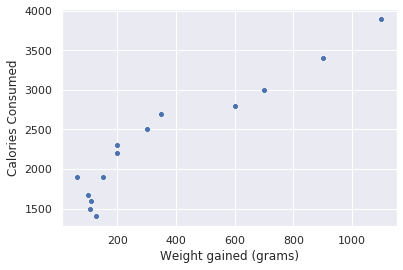

In [0]:
#Plotting Weight gained vs calories consumed graph

sns.set(style = 'darkgrid')
sns.scatterplot(x = "Weight gained (grams)", y = "Calories Consumed", data = data)

##Observations


*   For most of the points, the trend is like more the weight gained more is calories consumed.
*   There are atleast 3 points whic looks odd in this plot as for a lot of weight gained, the calories consumed is not very high.  



In [0]:
#Modelling
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(data["Calories Consumed"], data["Weight gained (grams)"], test_size = 0.15, random_state = 42)

In [0]:
#Regression Model
LR = LinearRegression()
X_train = np.reshape(list(X_train),(-1,1))
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X_test = np.reshape(list(X_test), (-1,1))
y_pred = LR.predict(X_test)

In [0]:
y_pred

array([972.69481622, 163.78569649,   2.00387255])

In [0]:
y_test

9     1100
11     150
0      108
Name: Weight gained (grams), dtype: int64

In [0]:
#R^2
print("R square for test data is:" , LR.score(X_test, y_test))

R square for test data is: 0.9561011101683481
